In [1]:
import numpy
from matplotlib import pyplot, animation
from IPython.display import HTML
%matplotlib inline

In [2]:
# Set the font family and size to use for Matplotlib figures.
pyplot.rcParams['font.family'] = 'serif'
pyplot.rcParams['font.size'] = 16

In [3]:
from traffic import rho_red_light, flux

In [4]:
# Set parameters
nx = 100  # number of cells along the road
L = 4.0  # length of the road
dx = L / nx  # cell width
nt = 30  # number of time steps to compute
rho_max = 10.0  # maximum traffic density allowed
rho_light = 10.0 # car density at the stoplight
u_max = 1.0  # speed limit

# Get the grid-cell centers.
# x_i is now the center of the i-th cell.
x = numpy.linspace(0.0 + 0.5 * dx, L - 0.5 * dx, num=nx)
print(x, numpy.shape(x))

# Compute the initial traffic density.
rho0 = rho_red_light(x, rho_max)

[0.02 0.06 0.1  0.14 0.18 0.22 0.26 0.3  0.34 0.38 0.42 0.46 0.5  0.54
 0.58 0.62 0.66 0.7  0.74 0.78 0.82 0.86 0.9  0.94 0.98 1.02 1.06 1.1
 1.14 1.18 1.22 1.26 1.3  1.34 1.38 1.42 1.46 1.5  1.54 1.58 1.62 1.66
 1.7  1.74 1.78 1.82 1.86 1.9  1.94 1.98 2.02 2.06 2.1  2.14 2.18 2.22
 2.26 2.3  2.34 2.38 2.42 2.46 2.5  2.54 2.58 2.62 2.66 2.7  2.74 2.78
 2.82 2.86 2.9  2.94 2.98 3.02 3.06 3.1  3.14 3.18 3.22 3.26 3.3  3.34
 3.38 3.42 3.46 3.5  3.54 3.58 3.62 3.66 3.7  3.74 3.78 3.82 3.86 3.9
 3.94 3.98] (100,)


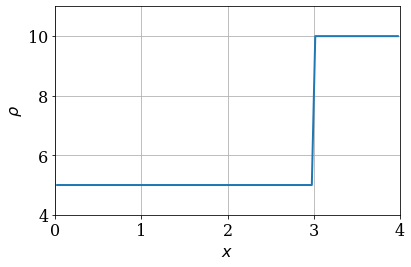

In [5]:
# Plot the initial car density on the road.
fig = pyplot.figure(figsize=(6.0, 4.0))
pyplot.xlabel(r'$x$')
pyplot.ylabel(r'$\rho$')
pyplot.grid()
line = pyplot.plot(x, rho0,
                   color='C0', linestyle='-', linewidth=2)[0]
pyplot.xlim(0.0, L)
pyplot.ylim(4.0, 11.0)
pyplot.tight_layout();

In [6]:
def godunov(rho0, nt, dt, dx, bc_values, *args):
    """
    Computes and returns the history of the traffic density
    on the road using a Godunov scheme
    with a Lax-Friedrichs flux.
    
    Parameters
    ----------
    rho0 : numpy.ndarray
        The initial traffic density along the road
        as a 1D array of floats.
    nt : integer
        The number of time steps to compute.
    dt : float
        The time-step size to integrate.
    dx : float
        The distance between two consecutive locations.
    bc_values : tuple or list
        The value of the density at the first and last locations
        as a tuple or list of two floats.
    args : list
        Positional arguments to be passed to the flux function.
    
    Returns
    -------
    rho_hist : list of numpy.ndarray objects
        The history of the car density along the road
        as a list of 1D arrays of floats.
    """
    rho_hist = [rho0.copy()]
    rho = rho0.copy()
    for n in range(nt):
        rhoL = rho[:-1]  # i-th value at index i-1/2
        rhoR = rho[1:]  # i+1-th value at index i-1/2
        # Compute the flux at cell boundaries.
        F = 0.5 * (flux(rhoL, *args) + flux(rhoR, *args) -
                   dx / dt * (rhoR - rhoL))
        #print(numpy.size(F))
        # Advance in time.
        rho[1:-1] = rho[1:-1] - dt / dx * (F[1:] - F[:-1])
        #print(numpy.size(rho[1:-1]))
        # Apply boundary conditions.
        rho[0], rho[-1] = bc_values
        # Record the time-step solution.
        rho_hist.append(rho.copy())
    return rho_hist

In [7]:
# Set time-step size based on CFL limit.
sigma = 1.0
dt = sigma * dx / u_max  # time-step size

# Compute the traffic density at all time steps.
rho_hist = godunov(rho0, nt, dt, dx, (rho0[0], rho0[-1]),
                   u_max, rho_max)

In [8]:
def update_plot(n, rho_hist):
    """
    Update the line y-data of the Matplotlib figure.
    
    Parameters
    ----------
    n : integer
        The time-step index.
    rho_hist : list of numpy.ndarray objects
        The history of the numerical solution.
    """
    fig.suptitle('Time step {:0>2}'.format(n))
    line.set_ydata(rho_hist[n])
    #line_1.set_ydata(rho_hist_1[n])

In [9]:
# Create an animation of the traffic density.
anim = animation.FuncAnimation(fig, update_plot,
                               frames=nt, fargs=(rho_hist,),
                               interval=100)
# Display the video.
HTML(anim.to_html5_video())

### Trying with green light problem where waves travel both towards left and right. 

In [10]:
#compute initial condition
def rho_green_light(x, rho_light):
    """  
    Parameters

    x: numpy.ndarray
        Locations on the road as a 1D array of floats
    rho_light : float
        Car density at the stoplight.
        
    Returns
    rho : numpy.ndarray
        The initial car density along the road as a 1D array of floats, at t = 0
        
    """
    
    rho = numpy.zeros_like(x) #_like(x) creates the shape of the array same as x array
    mask = numpy.where(x<2.0)
    rho[mask] = rho_light*x[mask]/2.0
    return rho

In [11]:
rho0_1 = rho_green_light(x, rho_light)

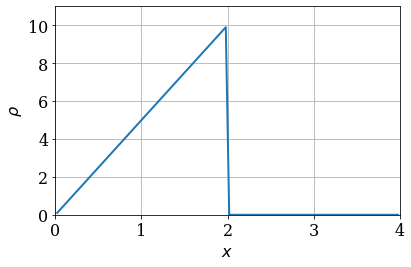

In [12]:
#Plotting initial condition
fig_1 = pyplot.figure(figsize=(6.0, 4.0))
pyplot.xlabel(r'$x$')
pyplot.ylabel(r'$\rho$')
pyplot.grid()
line_1 = pyplot.plot(x, rho0_1,
                   color='C0', linestyle='-', linewidth=2)[0]
pyplot.xlim(0.0, L)
pyplot.ylim(0.0, 11.0)
pyplot.tight_layout();

In [13]:
# Compute the traffic density at all time steps.
rho_hist_1 = godunov(rho0_1, nt, dt, dx, (rho0_1[0], rho0_1[-1]),
                   u_max, rho_max)

In [14]:
def update_plot(n, rho_hist):
    """
    Update the line y-data of the Matplotlib figure.
    
    Parameters
    ----------
    n : integer
        The time-step index.
    rho_hist : list of numpy.ndarray objects
        The history of the numerical solution.
    """
    fig.suptitle('Time step {:0>2}'.format(n))
    line_1.set_ydata(rho_hist_1[n])
    #line_1.set_ydata(rho_hist_1[n])

In [15]:
# Create an animation of the traffic density.
anim = animation.FuncAnimation(fig_1, update_plot,
                               frames=nt, fargs=(rho_hist_1,),
                               interval=100)
# Display the video.
HTML(anim.to_html5_video())